
# 线性回归例子
## 银行贷款预测系统:通过贷款人的信息预测可贷款额度


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# 1. 读取数据
data = pd.read_csv("loan_data.csv")
print("数据预览：")
print(data.head())

数据预览：
   年龄 (Age)  年收入 (Income)  信用评分 (Credit Score)  贷款额度 (Loan Amount)
0        25         50000                  600                1000
1        30         60000                  650                2500
2        35         70000                  700                3000
3        40         80000                  750                4000
4        45         90000                  800                5000


In [4]:
# 2. 提取特征和目标变量
X = data[["年龄 (Age)", "年收入 (Income)", "信用评分 (Credit Score)"]].values
y = data["贷款额度 (Loan Amount)"].values

In [5]:
# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# 4. 创建线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)  # 训练模型

LinearRegression()

In [7]:
# 5. 预测
y_pred_train = model.predict(X_train)  # 训练集预测
y_pred_test = model.predict(X_test)    # 测试集预测


In [8]:
# 6. 评估模型
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"训练集均方误差 (MSE): {mse_train}")
print(f"测试集均方误差 (MSE): {mse_test}")
print(f"训练集 R² 分数: {r2_train}")
print(f"测试集 R² 分数: {r2_test}")

训练集均方误差 (MSE): 5.686866711302065e-24
测试集均方误差 (MSE): 125000.0
训练集 R² 分数: 1.0
测试集 R² 分数: 0.9881656804733728


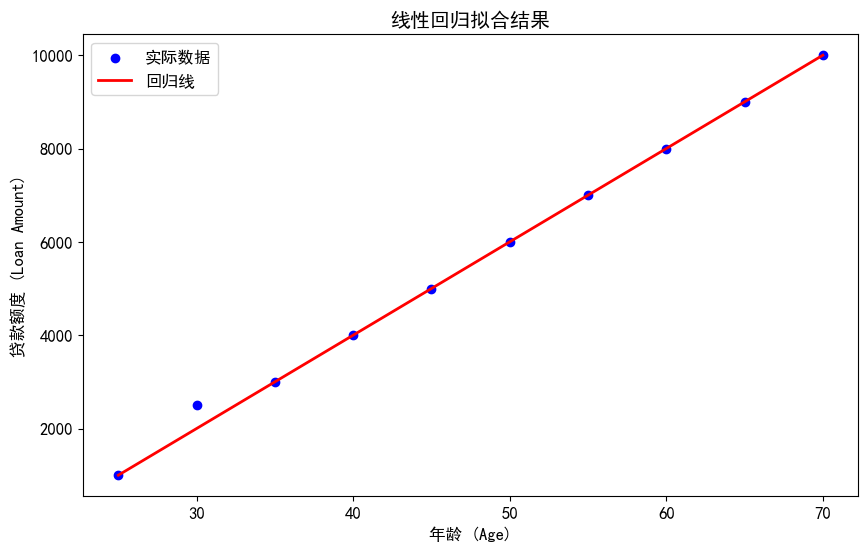

In [10]:
# 7. 可视化结果
# 由于是多特征数据，我们选择一个特征（如年龄）进行可视化
import matplotlib.pyplot as plt
import matplotlib

# 设置全局字体为支持中文的字体
matplotlib.rcParams['font.family'] = 'SimHei'  # Windows 系统使用黑体
matplotlib.rcParams['font.size'] = 12  # 设置字体大小
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号
plt.figure(figsize=(10, 6))
plt.scatter(data["年龄 (Age)"], data["贷款额度 (Loan Amount)"], color="blue", label="实际数据")
plt.plot(data["年龄 (Age)"], model.predict(X), color="red", linewidth=2, label="回归线")
plt.xlabel("年龄 (Age)")
plt.ylabel("贷款额度 (Loan Amount)")
plt.title("线性回归拟合结果")
plt.legend()
plt.show()